<a href="https://colab.research.google.com/github/satyam-jyoti-sankar/Bike-Sharing-Demand-Prediction-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Project Title : Seoul Bike Sharing Demand Prediction

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour(y)
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [20]:
# Install plotly package to show output in png format so i show it in github
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df=pd.read_csv('/content/drive/MyDrive/ capstone2/SeoulBikeData.csv',encoding = 'ISO-8859-1')

In [23]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [25]:
# Show no of columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [26]:
# it sum no of missing valu in our data
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Here we found no missing data is present.

# Preprocess data

In [27]:
# Here we just rename our columns as for suitable
df = df.rename(columns={'Temperature(°C)':'Temperature',
                       'Humidity(%)':'Humidity',
                       'Wind speed (m/s)':'wind speed',
                       'Visibility (10m)':'Visibility',
                       'Dew point temperature(°C)':'Dew point temperature',
                       'Solar Radiation (MJ/m2)':'Solar Radiation ',
                       'Rainfall(mm)':'Rainfall',
                        'Snowfall (cm)':'Snowfall '
                       })
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [28]:
# search no of duplicate row
print('No of duplicate row in the dataset is:',df.duplicated().sum())

No of duplicate row in the dataset is: 0


In [29]:
# Only for numarical coloum
df.describe()

,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [30]:
# Numarical dataset
df1=df[df.describe().columns]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 684.5 KB


As we seen in before Date is object type so we convert it to date tym format sothat we can do differce calulation from this.

In [31]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.tail()

,Date,Rented Bike Count,Hour,Temperature,Humidity,wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Year,Month,Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


If i conclude directly date it is uniqe no alwas so it affect our data during prediction also no proper EDA evaluatation so we devided into year,date,and month then drop our original date coloum.

In [32]:
df.drop(columns=['Date'],axis='columns',inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   wind speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew point temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning Day        8760 non-null   object 
 13  Year                   8760 non-null   int64  
 14  Month                  8760 non-null   int64  
 15  Day 

In [34]:
x=['Seasons','Holiday','Functioning Day']
y={}
for i in x:
  y[i]=df[i].unique()
y
# as for our reqarment we can convert those catagorycal variable to binary format as for calculatation


 

{'Functioning Day': array(['Yes', 'No'], dtype=object),
 'Holiday': array(['No Holiday', 'Holiday'], dtype=object),
 'Seasons': array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)}

# EDA

## Comparison between Book on Holiday and normal day

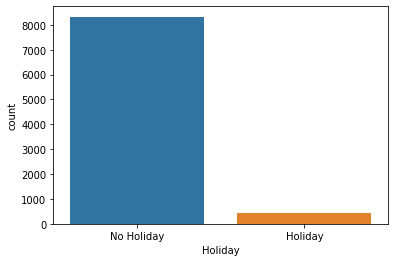

In [35]:
sns.countplot(df['Holiday'])

## Count no of rented bike as for holiday and normal day.

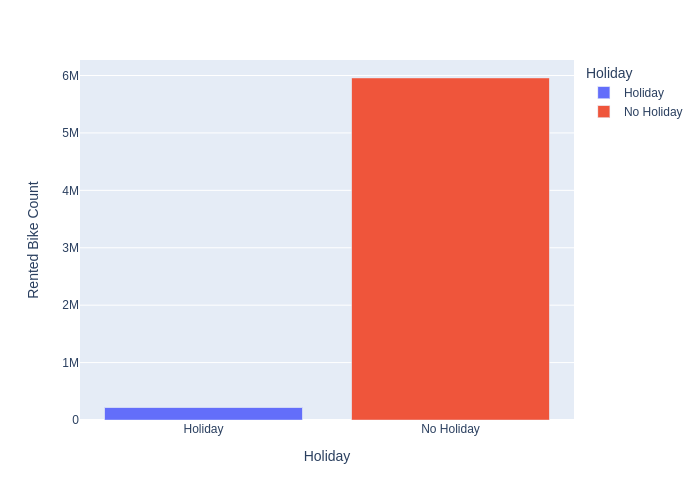

In [36]:
import plotly.express as px
Holiday = df.groupby("Holiday")['Rented Bike Count'].sum().reset_index()
fig = px.bar(Holiday, x='Holiday', y='Rented Bike Count',color='Holiday')
#fig.show()
fig.show(renderer="png")

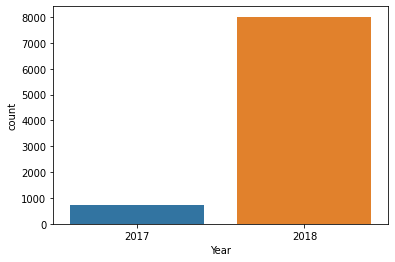

In [37]:
sns.countplot(x="Year", data=df)

Here we se that in compare to 2017,2018 rental bike usegs is so high

## Cout no of rented bike monthly wise

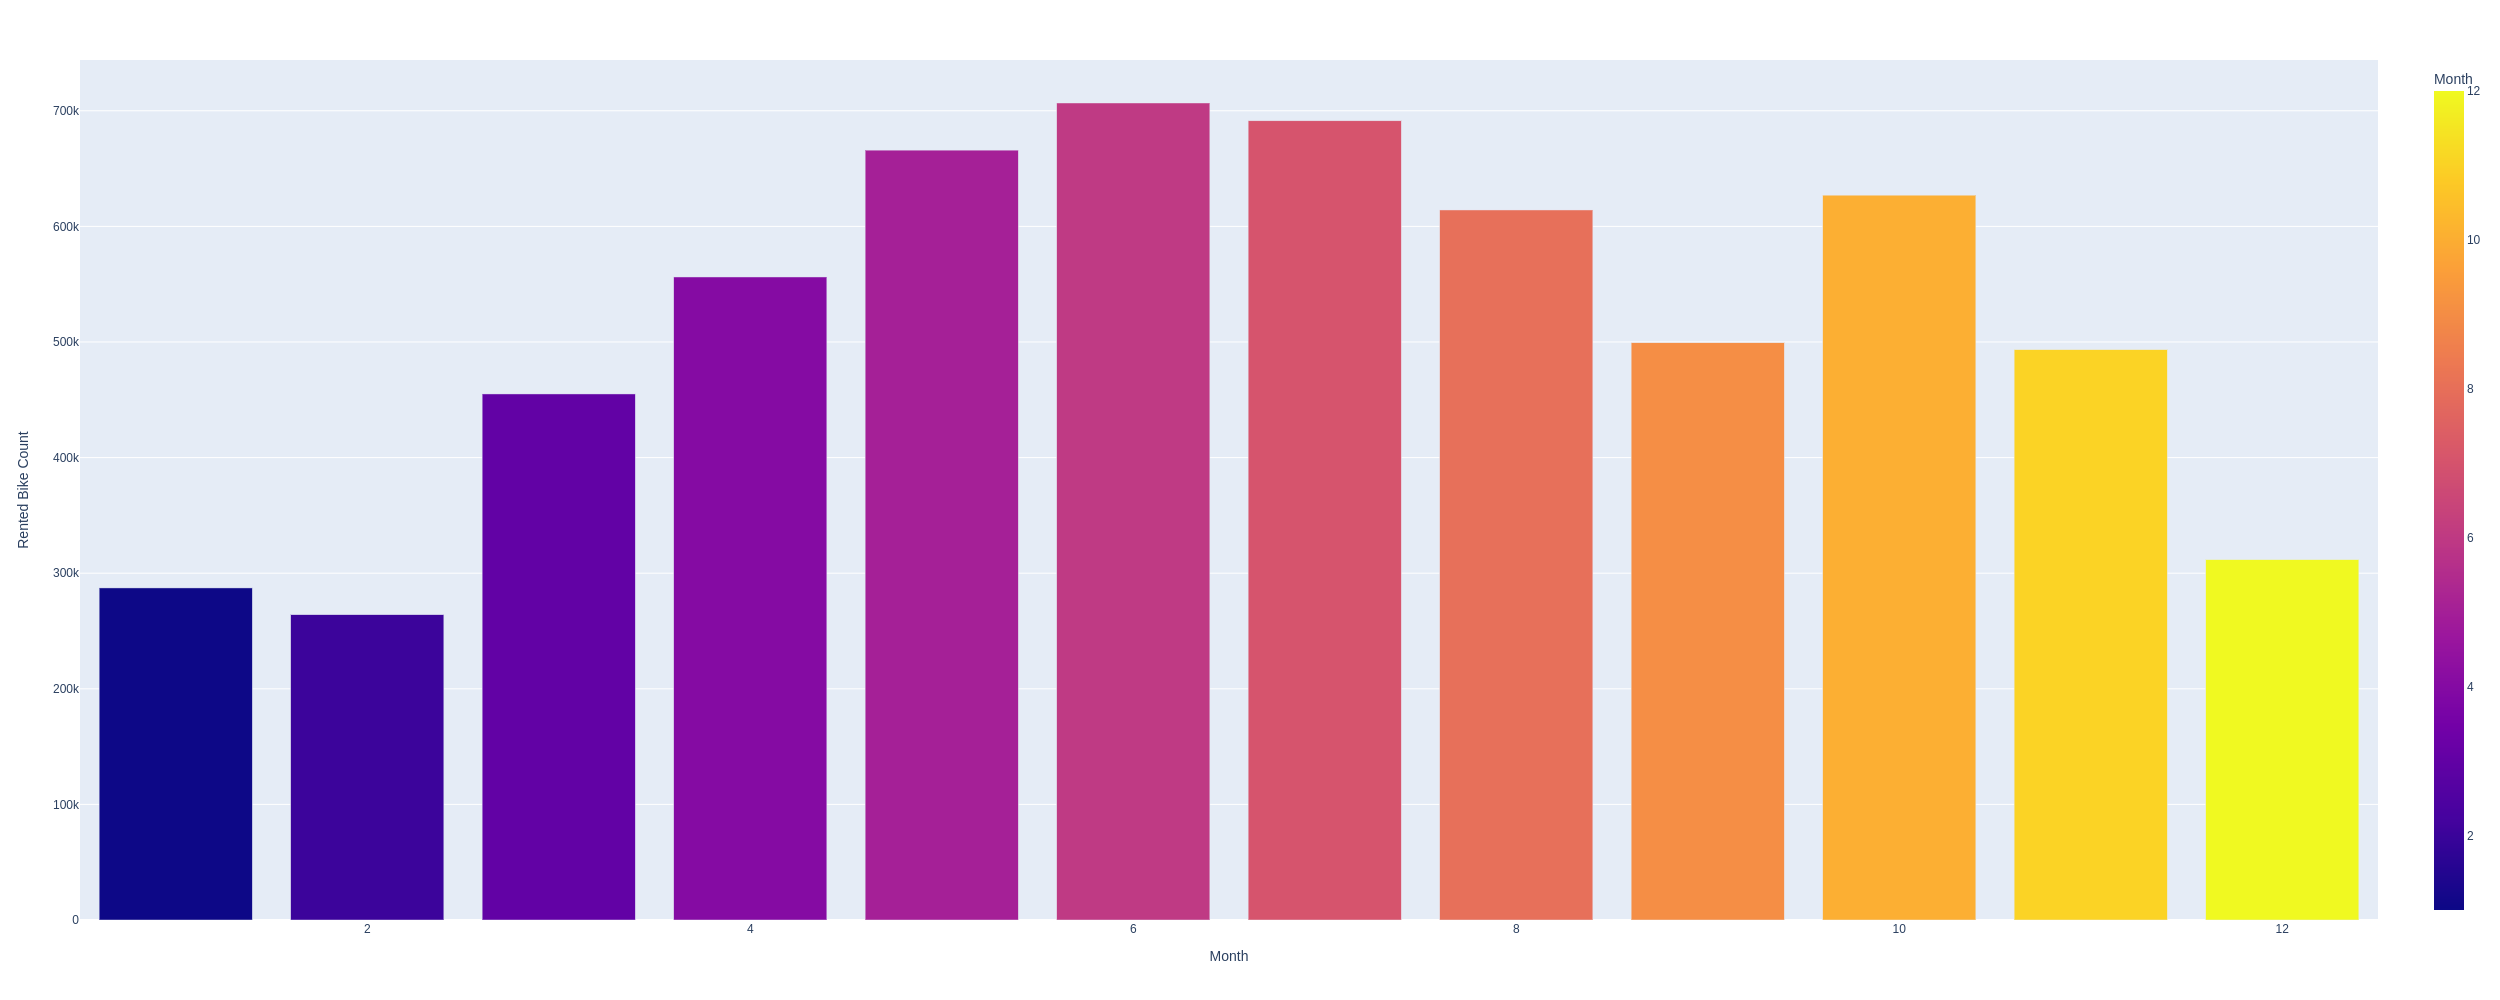

In [38]:
Month = df.groupby("Month")['Rented Bike Count'].sum().reset_index()
 
fig = px.bar(Month, x='Month', y='Rented Bike Count',color = 'Month',
              height=400)
# fig.show()
fig.show(renderer="png",width=2500, height=1000)

## Day wise rental book of bike

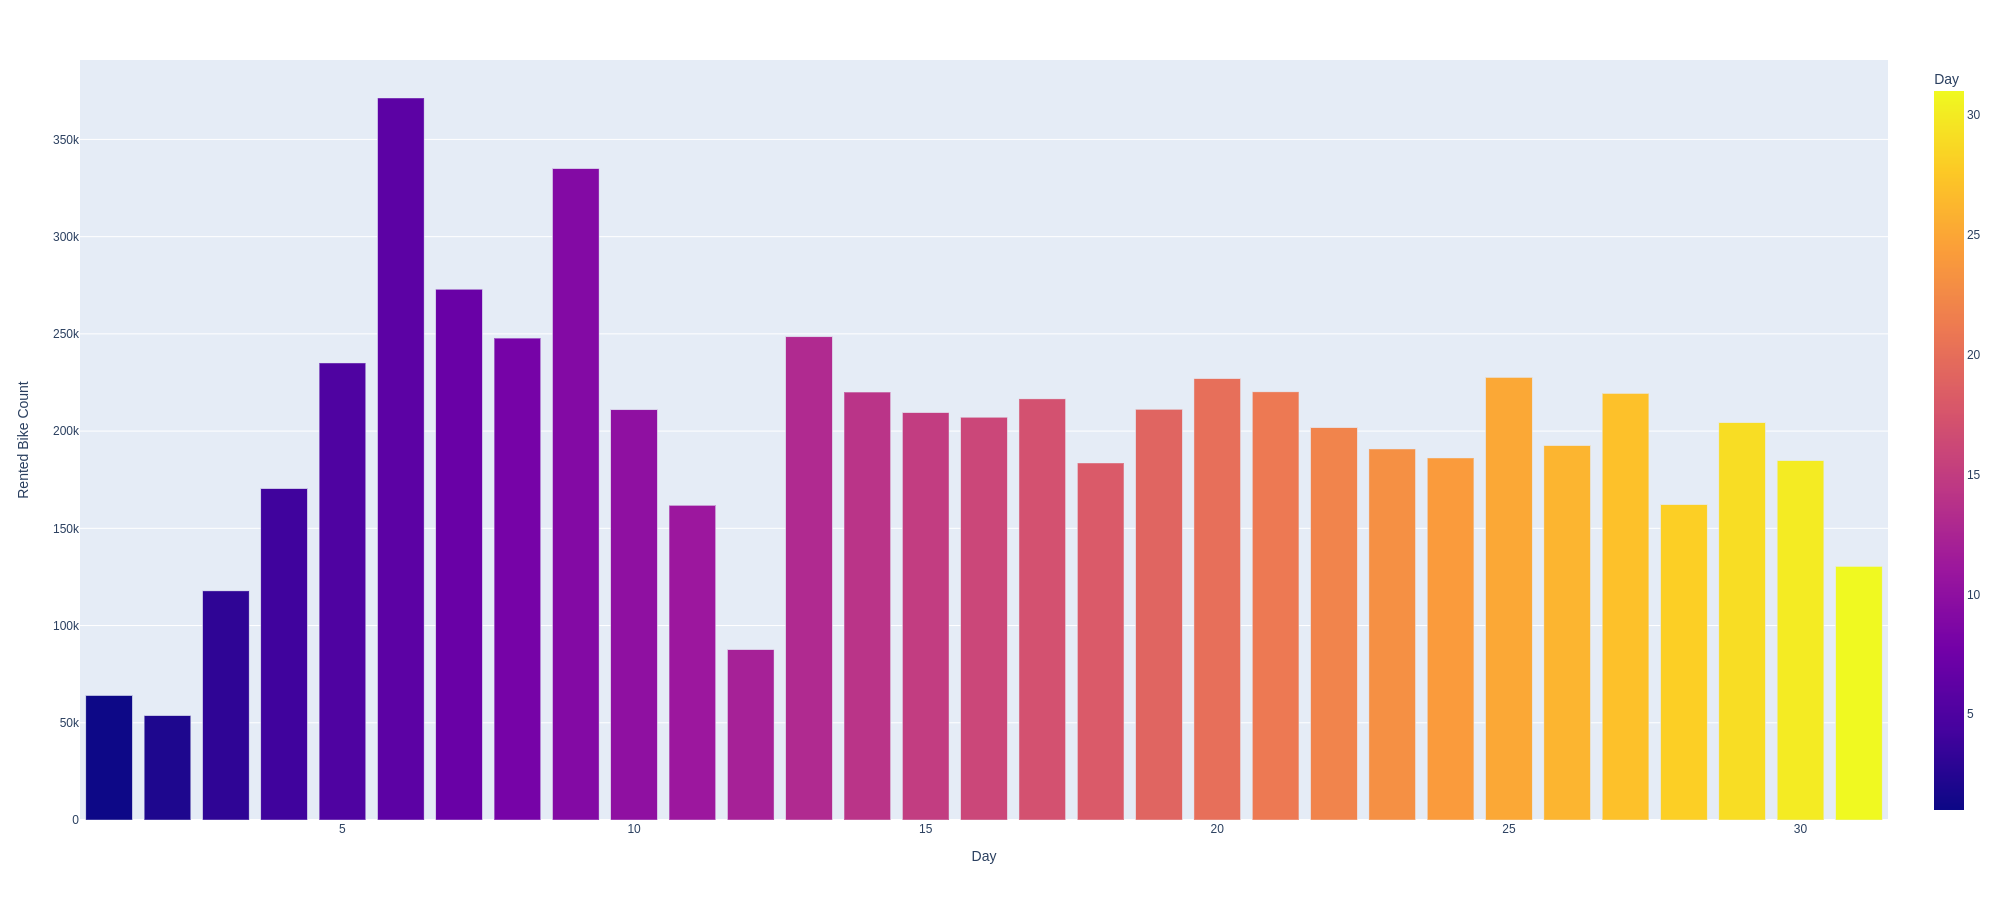

In [39]:
Day =df.groupby("Day").sum().reset_index()
fig = px.bar(Day, x='Day', y='Rented Bike Count',color = 'Day',
              height=400)
# fig.show()
fig.show(renderer="png",width=2000, height=900)

## How many total rental of bike as for each seasons

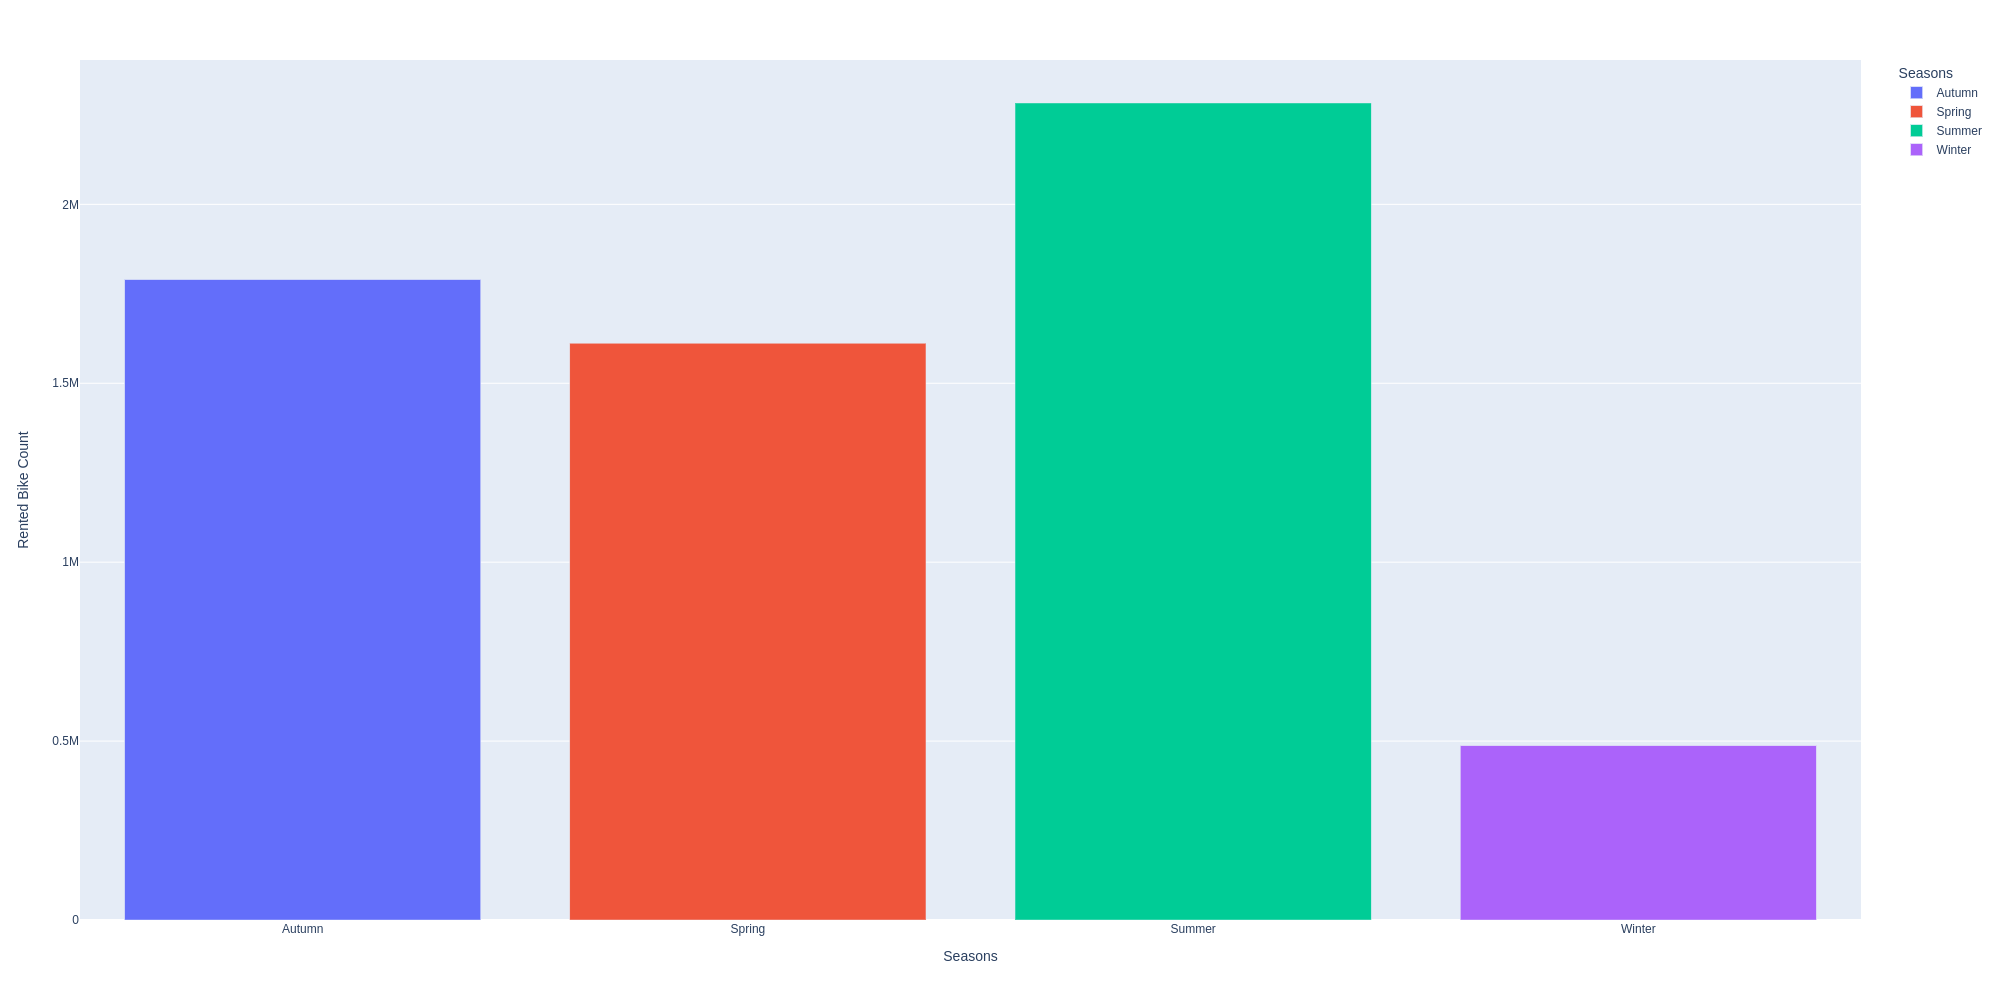

In [40]:
seasons= df.groupby('Seasons').sum().reset_index()
fig = px.bar(seasons, x='Seasons', y='Rented Bike Count',color = 'Seasons',height=400)
# fig.show()
fig.show(renderer="png",width=2000, height=1000)

## Book bike for no of hour as for seasons,Holiday and functioning day 

In [41]:
x=[]
for i in list(df.columns):
  if i not in df[df.describe().columns]:
    x.append(i)
x

['Seasons', 'Holiday', 'Functioning Day']

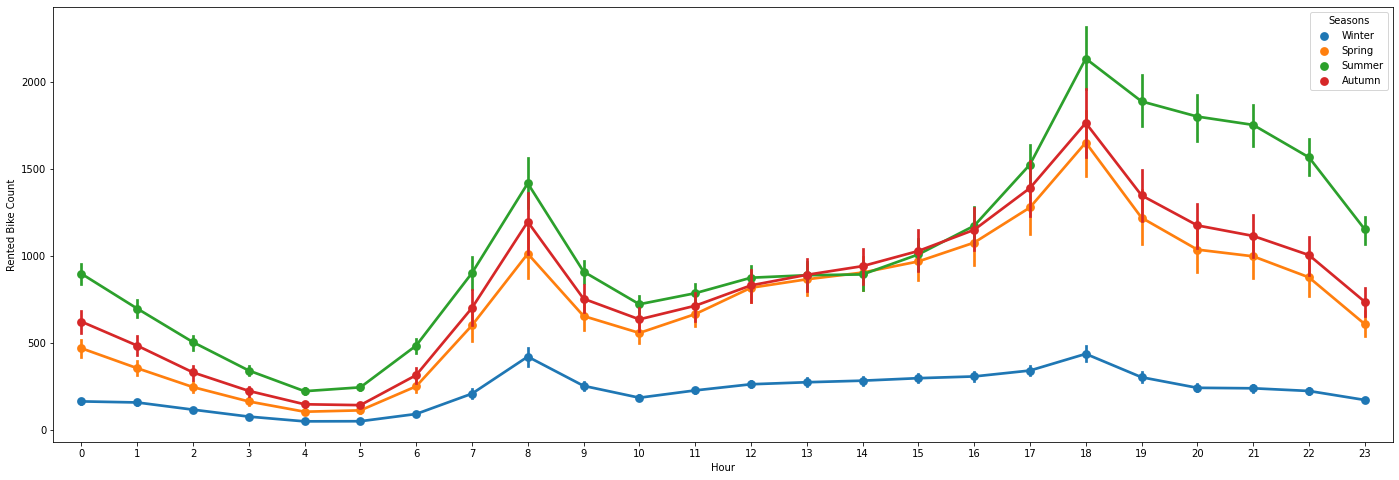

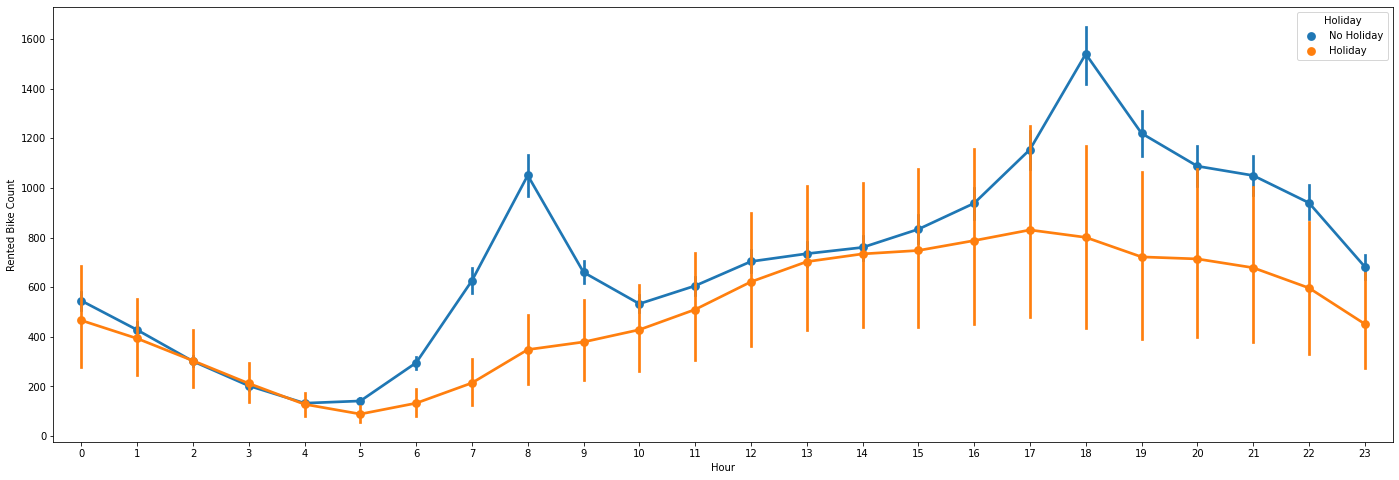

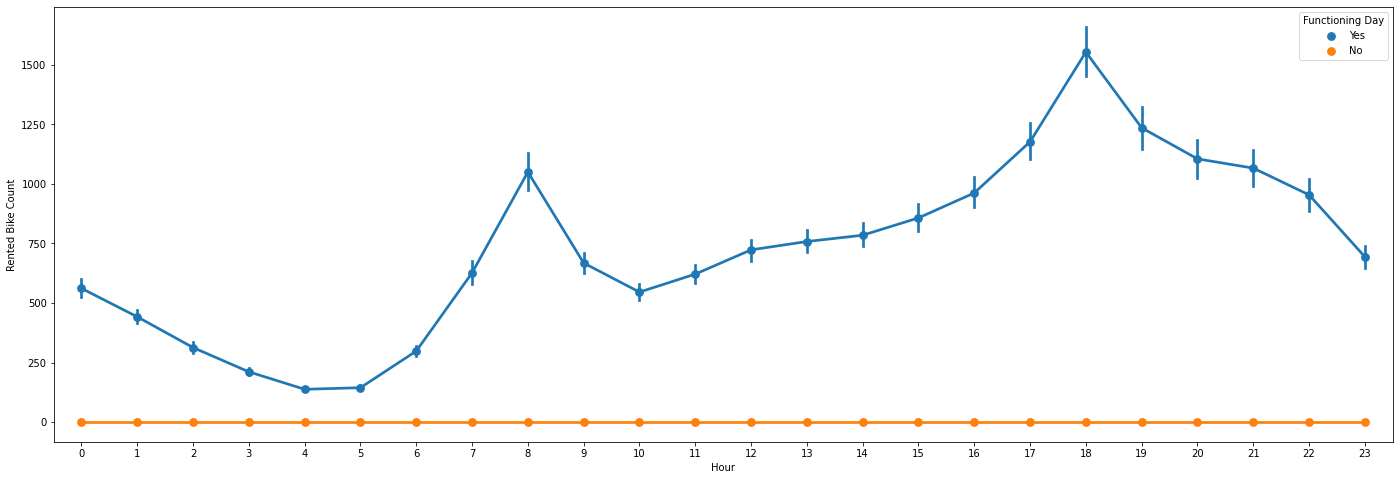

In [42]:
#x=[ 'Holiday','Seasons','Functioning Day']
for i in x:
     
    plt.figure(figsize=(24,8))
    sns.pointplot(data=df, x="Hour", y="Rented Bike Count", hue=i)
 

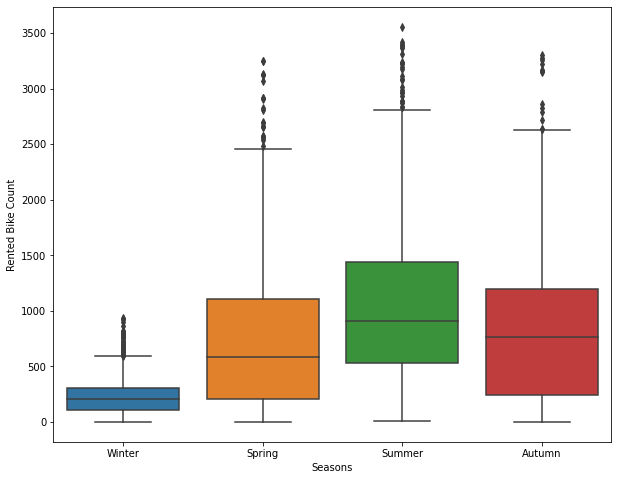

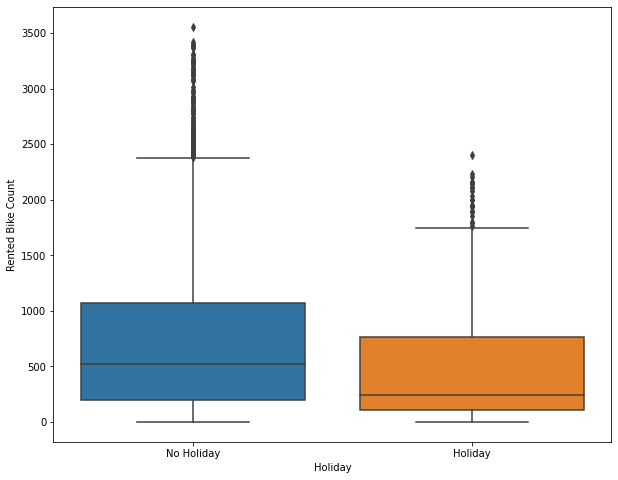

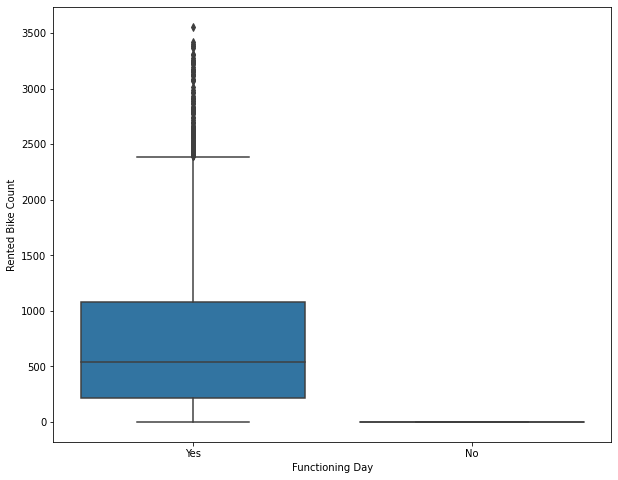

In [43]:
#ploting Box plot to visualize and trying to get information from plot
for col in x:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=df[col],y=df["Rented Bike Count"])
  plt.show()

## Regplot shoow  corelation between our bike rent with all other factor.

In [44]:
x=list(df1.columns)
len(x)

10

## Regplot shoow  corelation between our bike rent with all other factor.

In [45]:
x=list(df1.columns)
len(x)

10

[Text(0.5, 1.0, 'Relation between Snowfall  and Rented Bike Count')]

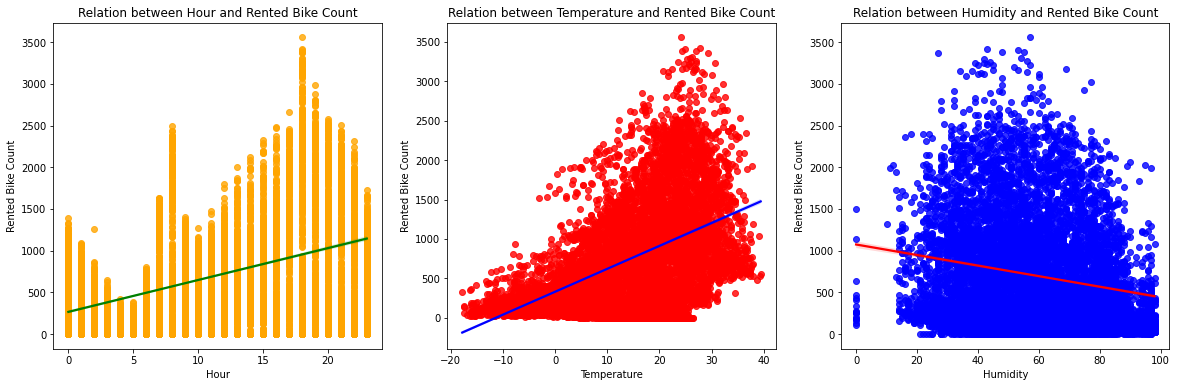

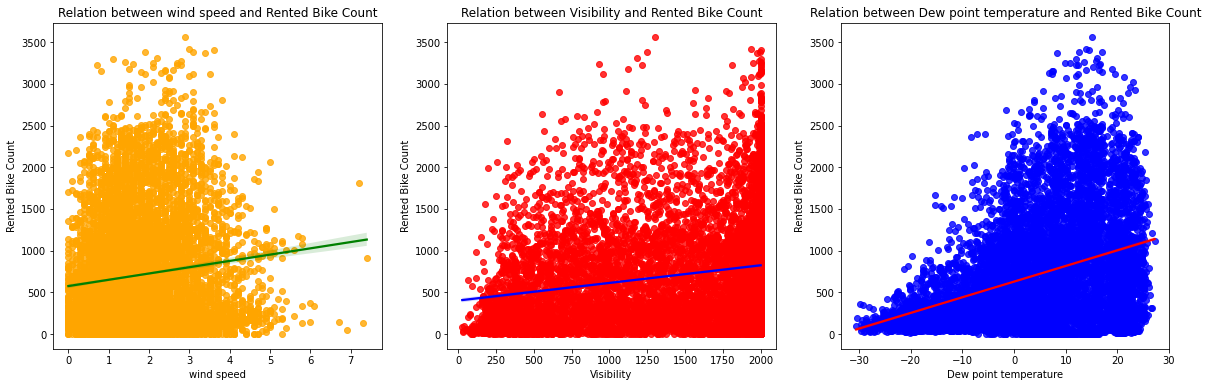

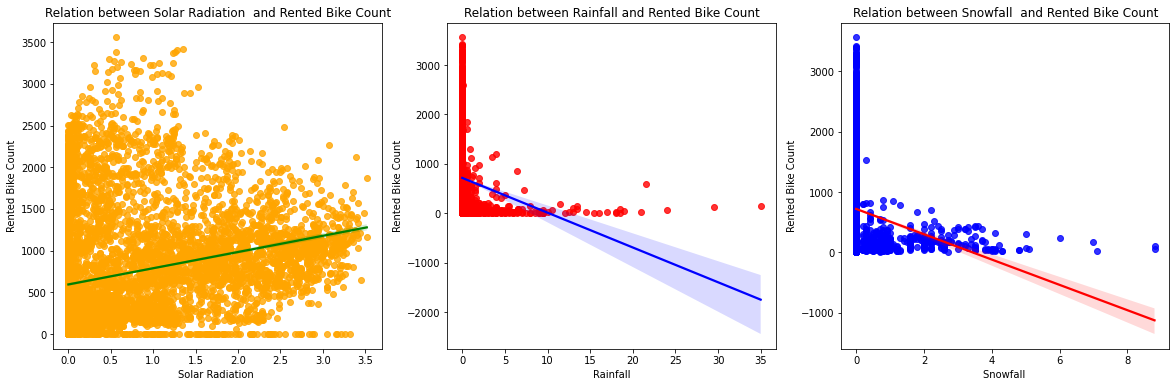

In [46]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df[x[1]], y=df['Rented Bike Count'], ax=ax1 ,scatter_kws={"color": "orange"}, line_kws={"color": "green"})
ax1.set(title=f"Relation between {x[1]} and Rented Bike Count")
sns.regplot(x=df[x[2]], y=df['Rented Bike Count'], ax=ax2,scatter_kws={"color": "Red"}, line_kws={"color": "blue"})
ax2.set(title=f"Relation between {x[2]} and Rented Bike Count")
sns.regplot(x=df[x[3]], y=df['Rented Bike Count'], ax=ax3, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax3.set(title=f"Relation between {x[3]} and Rented Bike Count")
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df[x[4]], y=df['Rented Bike Count'], ax=ax1 ,scatter_kws={"color": "orange"}, line_kws={"color": "green"})
ax1.set(title=f"Relation between {x[4]} and Rented Bike Count")
sns.regplot(x=df[x[5]], y=df['Rented Bike Count'], ax=ax2,scatter_kws={"color": "Red"}, line_kws={"color": "blue"})
ax2.set(title=f"Relation between {x[5]} and Rented Bike Count")
sns.regplot(x=df[x[6]], y=df['Rented Bike Count'], ax=ax3, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax3.set(title=f"Relation between {x[6]} and Rented Bike Count")
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,6))
sns.regplot(x=df[x[7]], y=df['Rented Bike Count'], ax=ax1 ,scatter_kws={"color": "orange"}, line_kws={"color": "green"})
ax1.set(title=f"Relation between {x[7]} and Rented Bike Count")
sns.regplot(x=df[x[8]], y=df['Rented Bike Count'], ax=ax2,scatter_kws={"color": "Red"}, line_kws={"color": "blue"})
ax2.set(title=f"Relation between {x[8]} and Rented Bike Count")
sns.regplot(x=df[x[9]], y=df['Rented Bike Count'], ax=ax3, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax3.set(title=f"Relation between {x[9]} and Rented Bike Count")
 

# coorelation Matrix

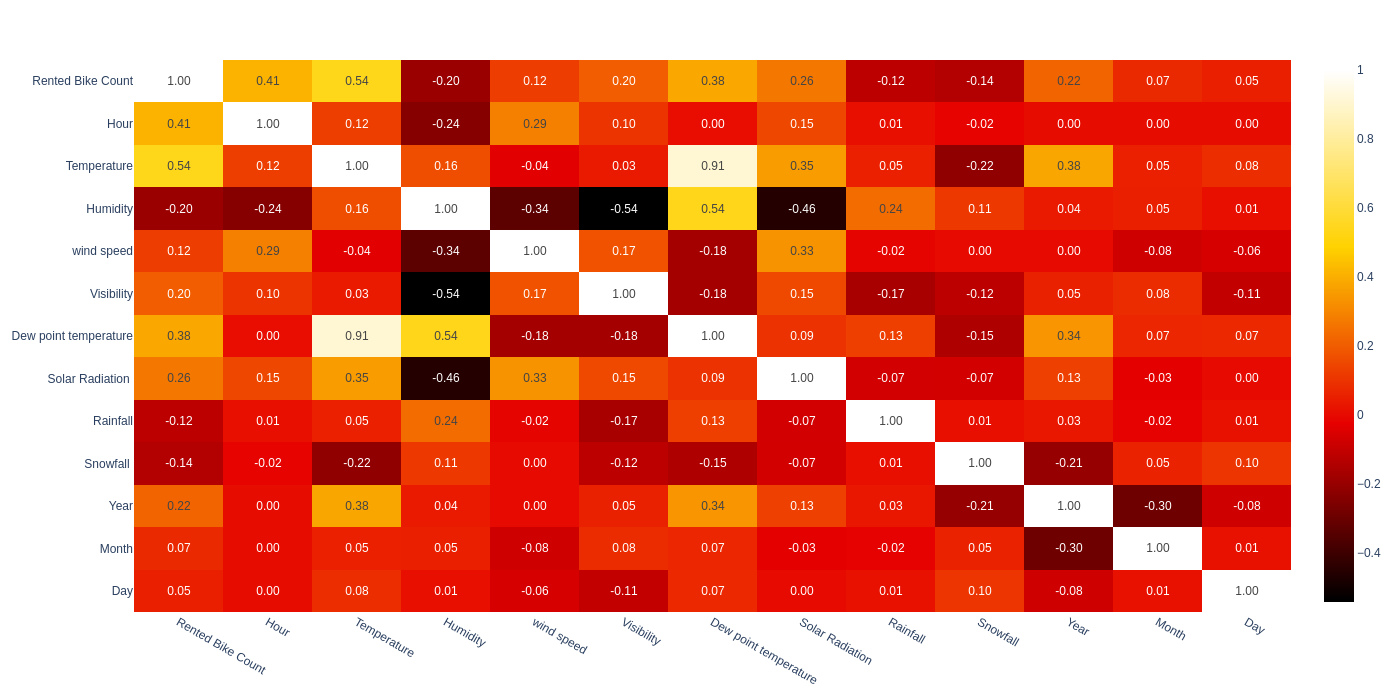

In [47]:
corr = df.corr()
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
# fig.show() 
fig.show(renderer="png",width=1400, height=700) 

From the above corelatation graph we se that there are 
>Highly Multi colinarity between tempture and dew point tempture.(0.91)
so we can add make them a single temp coloum
>in 2nd we se that the day and month are very less corilation with rented bike (0.07) ..so we drop it


In [48]:
### removing multicollear
df['Total_temp'] = 0.7*df['Temperature'] + 0.4*df['Dew point temperature']
df=df.drop(['Temperature','Dew point temperature'],axis=1)

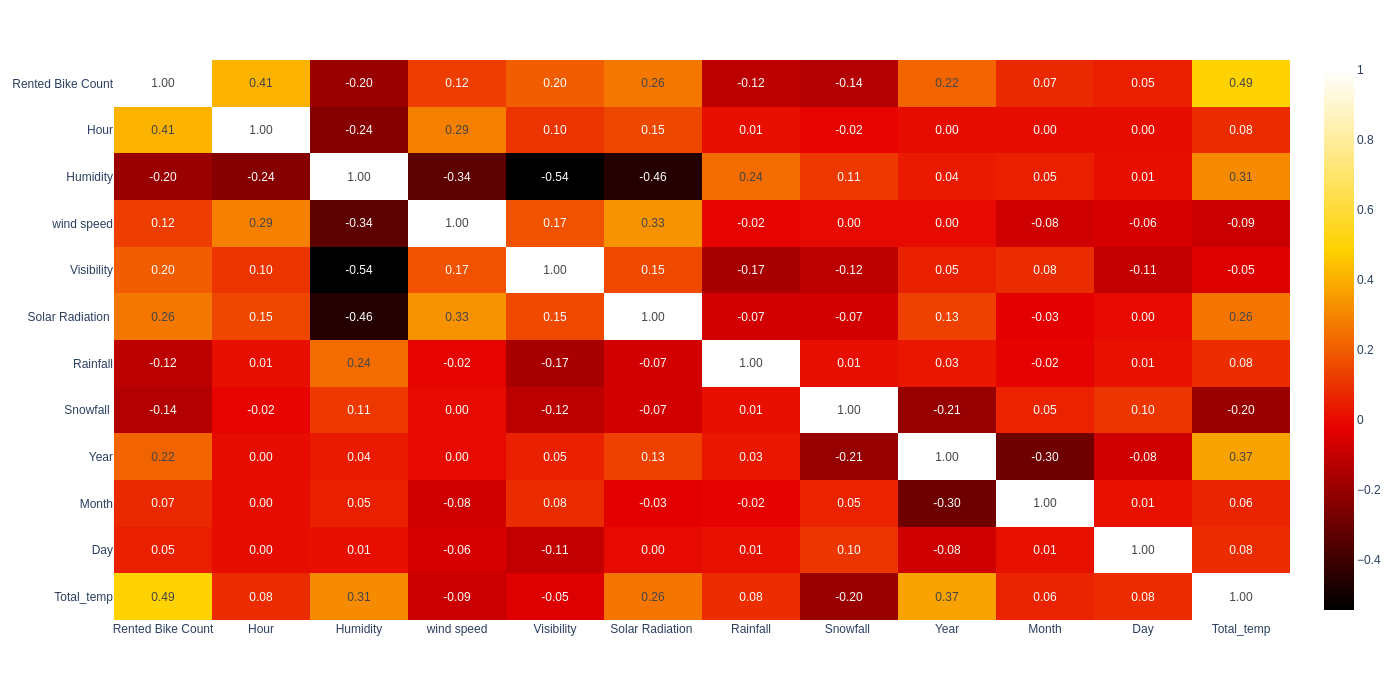

In [49]:
#after remove Multicollinearity
corr = df.corr()
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
fig.show(renderer="png",width=1400, height=700) 

skewness is:- 1.1532306631480034


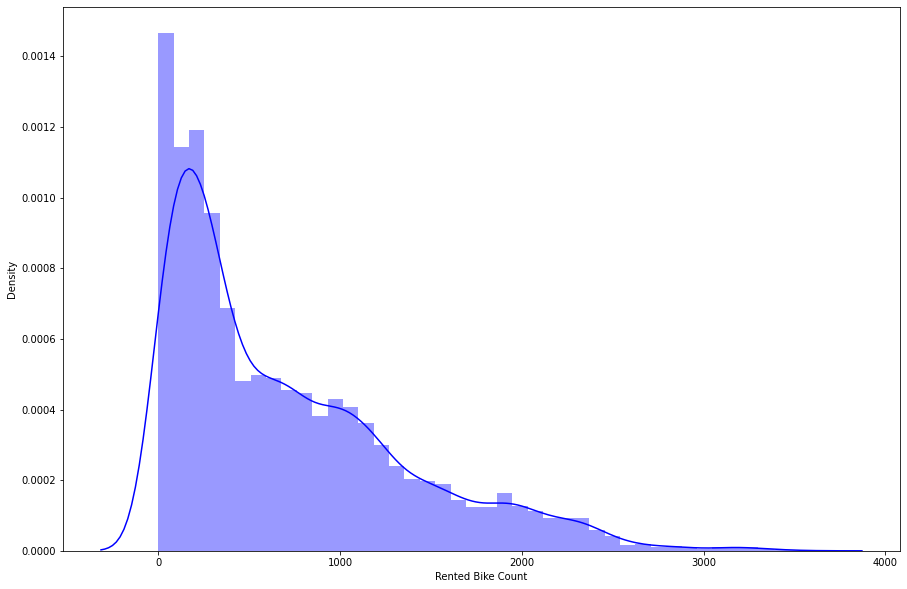

In [50]:
# Dependent variable 'Price'
from scipy.stats.stats import skew
plt.figure(figsize=(15,10))
sns.distplot(df['Rented Bike Count'],color="b")
print('skewness is:-',skew(df['Rented Bike Count']))

Here our dependent variable Rented Bike Cout is highly Posetively skewed


skwness is:- 0.23732144485836718


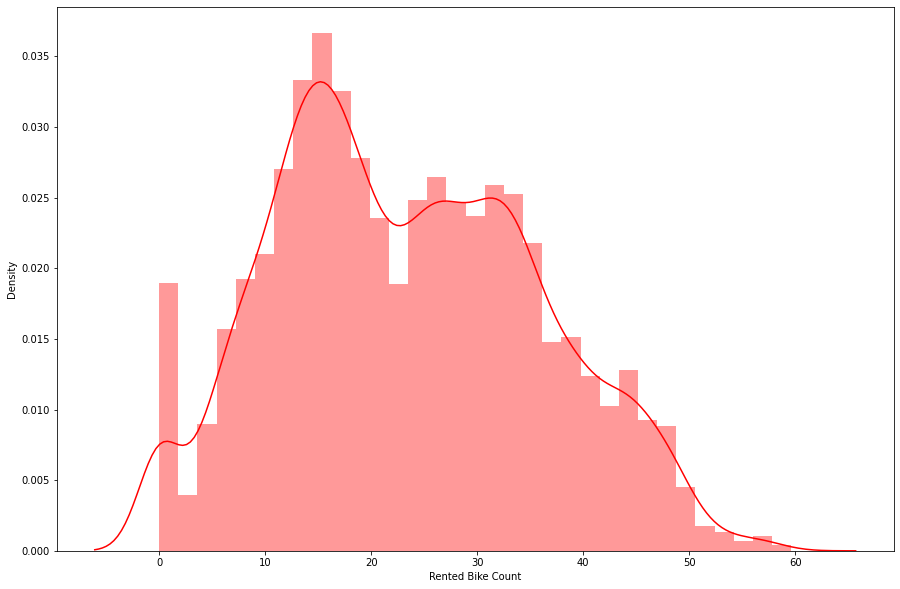

In [51]:
# from scipy.stats.stats import skew
plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(df['Rented Bike Count']),color="r")
# x=1
print('skwness is:-',skew(np.sqrt(df['Rented Bike Count'])))

# Data encoding

In [52]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Humidity', 'wind speed', 'Visibility',
       'Solar Radiation ', 'Rainfall', 'Snowfall ', 'Seasons', 'Holiday',
       'Functioning Day', 'Year', 'Month', 'Day', 'Total_temp'],
      dtype='object')

In [53]:
# convert object type data to dumy variables(binary form)
data=df.copy()
x=['Seasons','Holiday','Functioning Day','Month','Hour']
for i in x:
      data = pd.concat([data, pd.get_dummies(data[i], prefix=i, drop_first=True)], axis=1)
      data = data.drop([i], axis=1)
data.drop(['Year','Day'],axis=1)
data.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented Bike Count    8760 non-null   int64  
 1   Humidity             8760 non-null   int64  
 2   wind speed           8760 non-null   float64
 3   Visibility           8760 non-null   int64  
 4   Solar Radiation      8760 non-null   float64
 5   Rainfall             8760 non-null   float64
 6   Snowfall             8760 non-null   float64
 7   Year                 8760 non-null   int64  
 8   Day                  8760 non-null   int64  
 9   Total_temp           8760 non-null   float64
 10  Seasons_Spring       8760 non-null   uint8  
 11  Seasons_Summer       8760 non-null   uint8  
 12  Seasons_Winter       8760 non-null   uint8  
 13  Holiday_No Holiday   8760 non-null   uint8  
 14  Functioning Day_Yes  8760 non-null   uint8  
 15  Month_2              8760 non-null   u

In [54]:
#Assign the value in X and Y
x = data.drop(columns=['Rented Bike Count'], axis=1)
y = np.sqrt(data['Rented Bike Count'])

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=77)

In [56]:
# Transforming data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6570, 48) (6570,)
(2190, 48) (2190,)


# Aplly ML

## Linier regraration

In [58]:
train={}
test={}

In [59]:
# linier regratation
reg= LinearRegression().fit(x_train, y_train)

In [60]:
reg.score(x_train, y_train)

0.7629334199581261

In [61]:
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

In [62]:
# metrics for linier regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Linier regreson']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) 

MSE : 37.13314681383164
RMSE : 6.093697302445506
R2 : 0.7629334199581261
Adjusted R2 : 0.7576185223205689


In [63]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Linier regreson']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.273629840755824
RMSE : 6.1052133329438885
R2 : 0.750827145595724
Adjusted R2 : 0.745240832185446


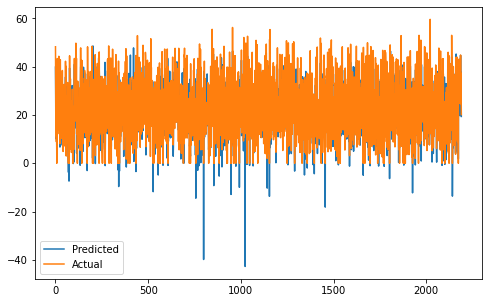

In [64]:
#Compare between y_pred_test vs original y_test
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

## Lasso
 


In [65]:
#importing lasso regression model
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso,parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [66]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -37.936072286585855


In [67]:
lasso=Lasso(alpha=0.001,max_iter=3000)
lasso.fit(x_train,y_train)

Lasso(alpha=0.001, max_iter=3000)

In [68]:
# lasso score 
lasso.score(x_train, y_train)

0.7629142641092735

In [69]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [70]:
# metrics for lasso regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Lasso regreson']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.13614730823984
RMSE : 6.0939434940143515
R2 : 0.7629142641092735
Adjusted R2 : 0.7575989370085006


In [71]:
# metrics for ridge regression for test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Lasso regreson']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))


MSE : 37.18201422405232
RMSE : 6.097705652460794
R2 : 0.7514395926479578
Adjusted R2 : 0.7458670099516018


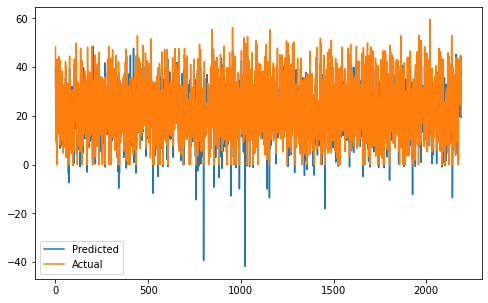

In [72]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##Ridge

In [73]:
from sklearn.linear_model import Ridge

ridge=Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [74]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -38.06587599355926


In [75]:
ridge= Ridge(alpha=0.01)
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [76]:
ridge.score(x_train, y_train) 

0.762933381019659

In [77]:
#y pred  ridge test and train
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

In [78]:
# metrics for ridge regression
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
train['Ridge regreson']=MSE,RMSE,r2,1-(1-r2_score(y_train, y_pred_train_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))


MSE : 37.13315291299508
RMSE : 6.093697802893993
R2 : 0.762933381019659
Adjusted R2 : 0.7576184825091236


In [79]:
# metrics for ridge regression for test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)) )
test['Ridge regreson']=MSE,RMSE,r2,1-(1-r2_score(y_test, y_pred_test_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

MSE : 37.26764694572257
RMSE : 6.104723330808905
R2 : 0.7508671410305504
Adjusted R2 : 0.7452817242951307


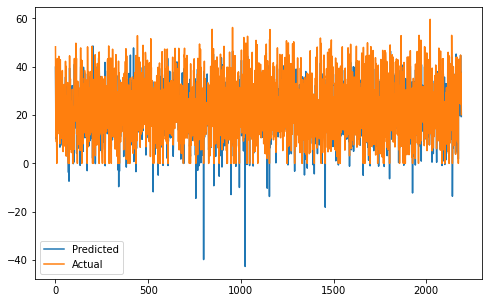

In [80]:
#plot for ridge 
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [81]:
test

{'Lasso regreson': (37.18201422405232,
  6.097705652460794,
  0.7514395926479578,
  0.7458670099516018),
 'Linier regreson': (37.273629840755824,
  6.1052133329438885,
  0.750827145595724,
  0.745240832185446),
 'Ridge regreson': (37.26764694572257,
  6.104723330808905,
  0.7508671410305504,
  0.7452817242951307)}